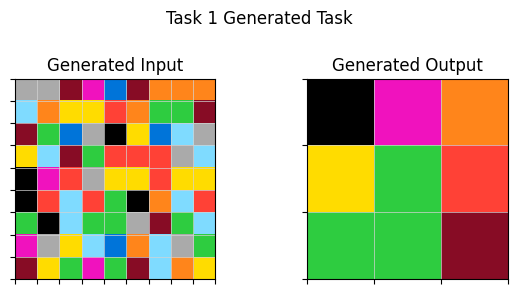

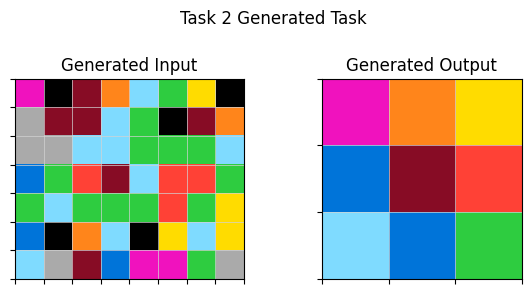

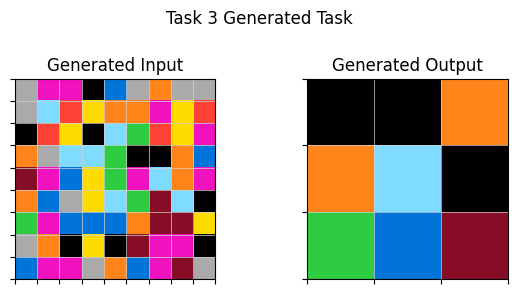

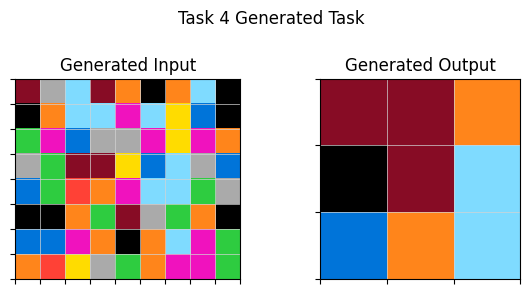

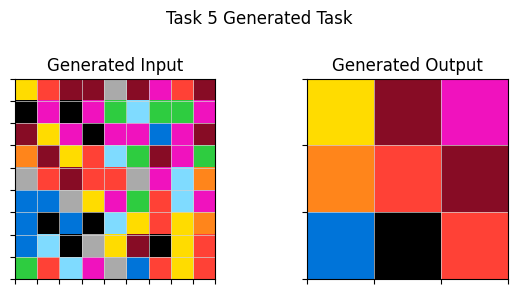

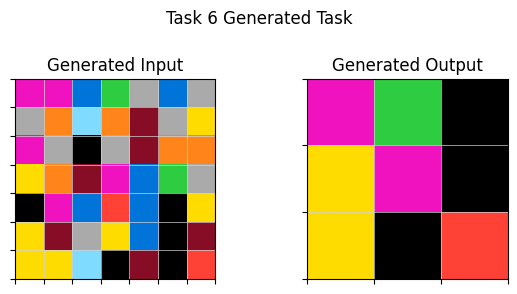

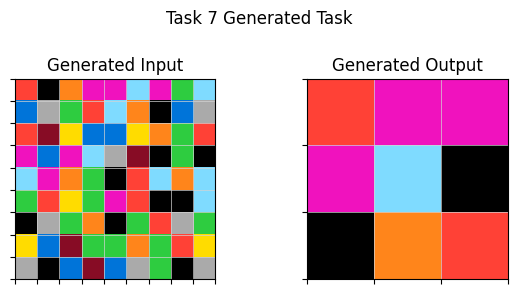

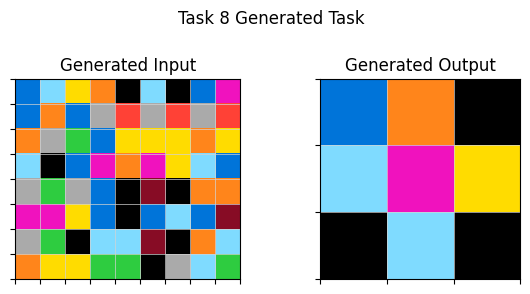

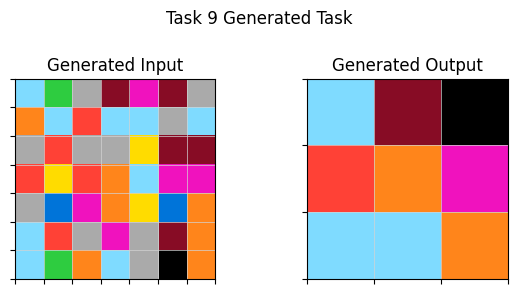

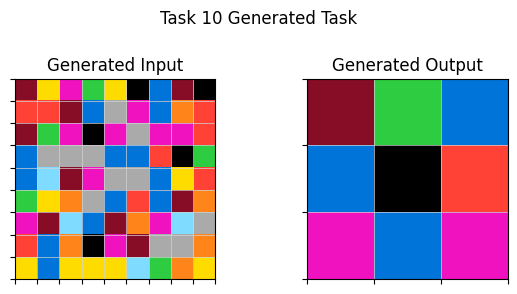

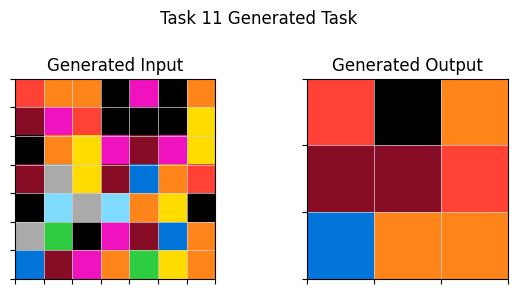

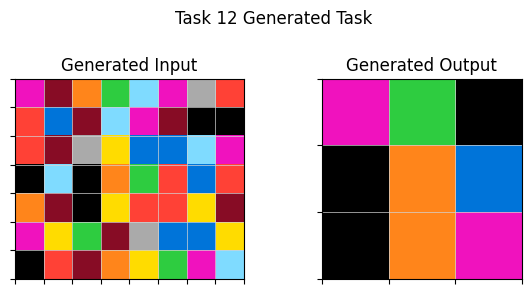

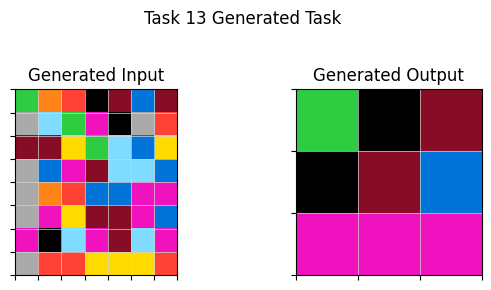

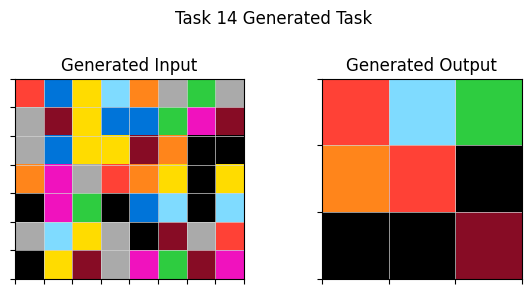

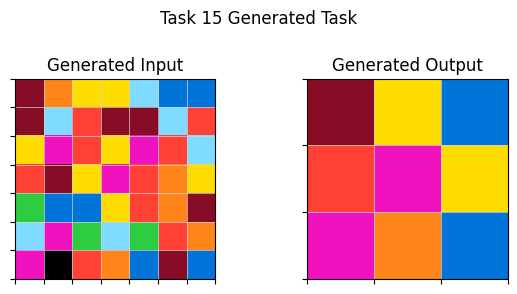

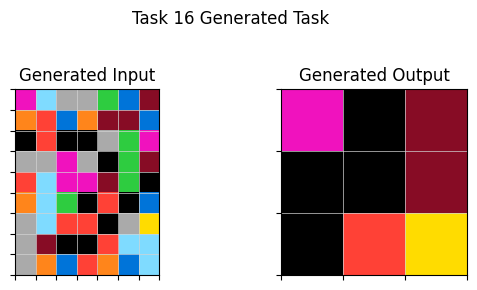

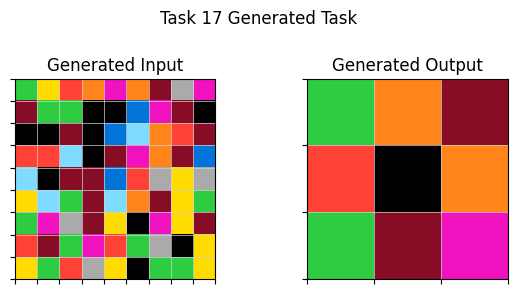

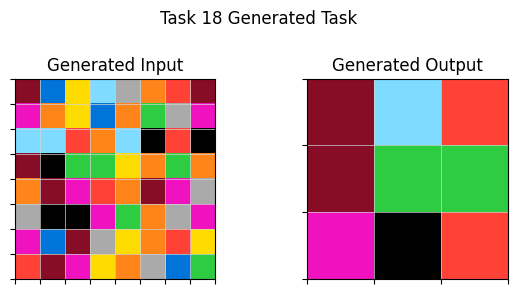

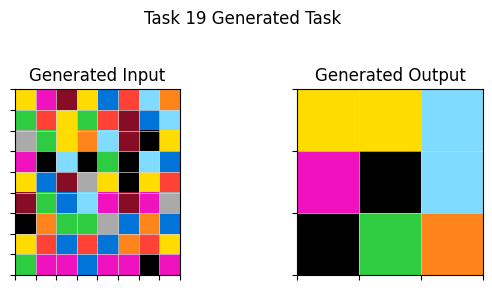

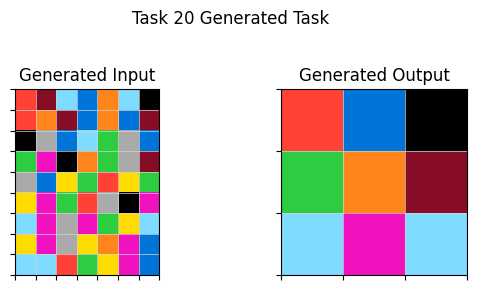

In [1]:
import numpy as np
import random
import copy
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Function to replace a specific value in the grid with another value
def replace(grid, replacee, replacer):
    """ color substitution """
    return tuple(tuple(replacer if v == replacee else v for v in r) for r in grid)

# Function to downscale the grid by a given factor
def downscale(grid, factor):
    """ downscale grid """
    h, w = len(grid), len(grid[0])
    g = tuple()
    for i in range(h):
        r = tuple()
        for j in range(w):
            if j % factor == 0:
                r = r + (grid[i][j],)
        g = g + (r,)
    h = len(g)
    dsg = tuple()
    for i in range(h):
        if i % factor == 0:
            dsg = dsg + (g[i],)
    return dsg

# Function to apply the task rule: replace all 5s with 0s and downscale by 3
def apply_task_rule(input_grid):
    x1 = replace(input_grid, 5, 0)
    return downscale(x1, 3)

# Generate initial population with random grid sizes and input patterns
def generate_initial_population(num_individuals=10, min_size=6, max_size=9):
    population = []
    for _ in range(num_individuals):
        rows = random.randint(min_size, max_size)
        cols = random.randint(min_size, max_size)
        individual = {
            'input_grid': np.random.randint(0, 10, size=(rows, cols))  # Random integers between 0 and 9
        }
        # Ensure each grid follows the task rule
        individual['output_grid'] = apply_task_rule(individual['input_grid'])
        population.append(individual)
    return population

# Fitness function to evaluate how well the task rule is applied
def fitness(individual):
    input_grid = individual['input_grid']
    expected_output = apply_task_rule(input_grid)
    
    # Count the number of matching elements between the generated output and the expected output
    correctly_transformed = np.sum(np.array(individual['output_grid']) == np.array(expected_output))
    
    # Reward grids with more correct transformations
    fitness_score = correctly_transformed * 10  # Reward correct transformations
    return fitness_score

# Select best individuals based on fitness score
def select_best_individuals(population, num_best=5):
    sorted_population = sorted(population, key=lambda x: fitness(x), reverse=True)
    return sorted_population[:num_best]

# Crossover function to combine two parent grids
def crossover(parent1, parent2):
    rows1, cols1 = parent1['input_grid'].shape
    rows2, cols2 = parent2['input_grid'].shape
    
    # Crossover only if parents have the same grid size
    if rows1 == rows2 and cols1 == cols2:
        child_input = parent1['input_grid'].copy()
        crossover_point = random.randint(1, rows1 - 2)
        child_input[crossover_point:, :] = parent2['input_grid'][crossover_point:, :]
        child_output = apply_task_rule(child_input)
        return {'input_grid': child_input, 'output_grid': child_output}
    else:
        return random.choice([parent1, parent2])  # If sizes don't match, pick one parent

# Mutate the grid by randomly changing some elements
def mutate(individual, mutation_rate=0.1):
    grid = individual['input_grid']
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            if random.random() < mutation_rate:
                grid[i, j] = random.randint(0, 9)  # Randomly change the value of the cell
    individual['output_grid'] = apply_task_rule(grid)
    return individual

# Main Genetic Algorithm Loop
def genetic_algorithm(num_generations=50, population_size=10, min_size=6, max_size=9):
    population = generate_initial_population(population_size, min_size, max_size)
    for generation in range(num_generations):
        best_individuals = select_best_individuals(population)
        new_population = []
        while len(new_population) < population_size:
            parent1, parent2 = random.sample(best_individuals, 2)
            child = crossover(parent1, parent2)
            child = mutate(child)
            new_population.append(child)
        population = new_population
    return select_best_individuals(population, num_best=1)[0]

# Visualization functions
def plot_one(ax, matrix, title):
    cmap = colors.ListedColormap(
        ['#000000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
         '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
    norm = colors.Normalize(vmin=0, vmax=9)

    ax.imshow(matrix, cmap=cmap, norm=norm)
    ax.grid(True, which='both', color='lightgrey', linewidth=0.5)
    ax.set_xticks([x - 0.5 for x in range(1 + len(matrix[0]))])
    ax.set_yticks([x - 0.5 for x in range(1 + len(matrix))])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title(title)

def plot_task(input_task, output_task, task_number):
    fig, axs = plt.subplots(1, 2, figsize=(6, 3))
    fig.suptitle(f'{task_number} Generated Task')
    plot_one(axs[0], input_task, 'Generated Input')
    plot_one(axs[1], output_task, 'Generated Output')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Generate 20 new tasks with diverse grid sizes and visualize them
new_tasks = []
for i in range(20):  # Generate 20 tasks
    best_individual = genetic_algorithm(num_generations=50, population_size=10, min_size=6, max_size=9)
    generated_input = best_individual['input_grid']
    generated_output = best_individual['output_grid']
    plot_task(generated_input, generated_output, f"Task {i + 1}")
    new_tasks.append((generated_input, generated_output))


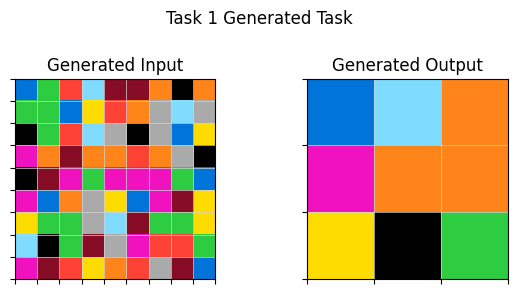

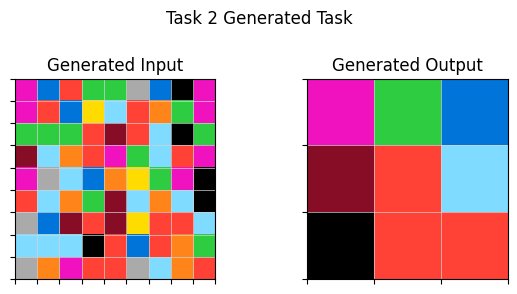

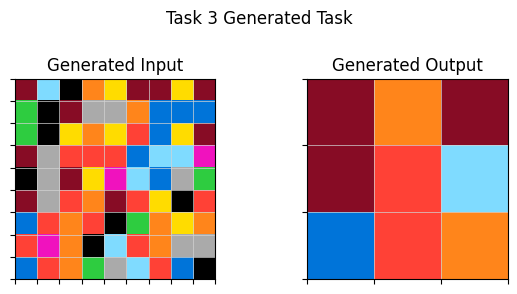

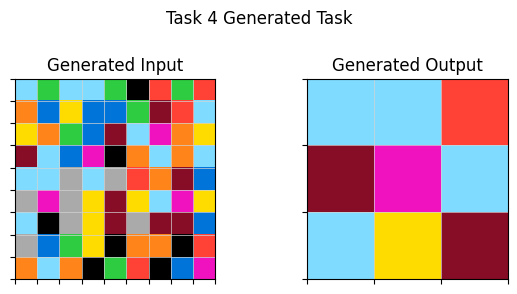

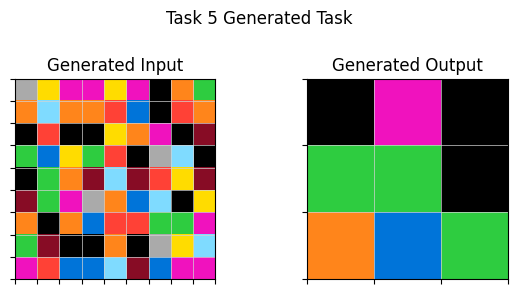

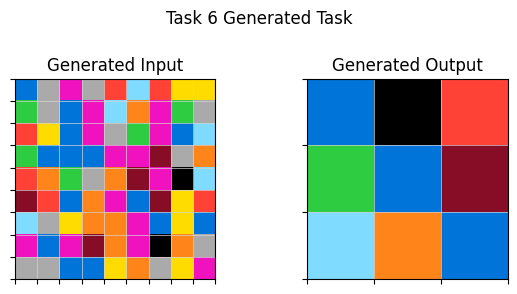

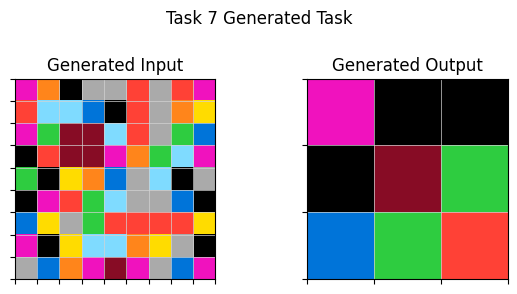

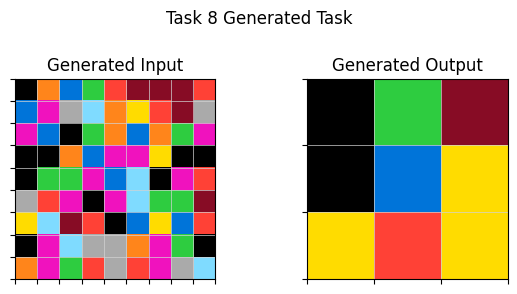

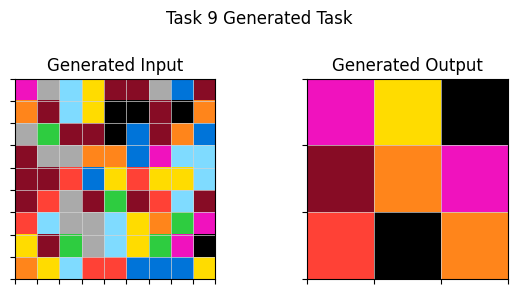

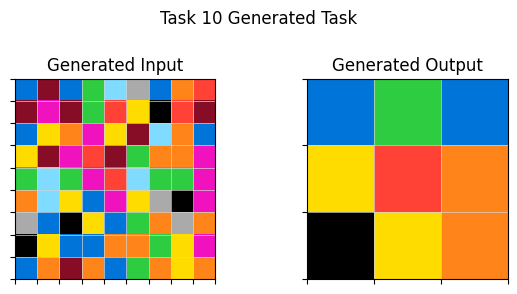

In [4]:
import numpy as np
import random
import copy
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Function to replace specific values
def replace(grid, replacee, replacer):
    """ Replace specific values in the grid """
    return tuple(tuple(replacer if v == replacee else v for v in row) for row in grid)

# Downscale function
def downscale(grid, factor):
    """ Downscale the grid by a specific factor """
    h, w = len(grid), len(grid[0])
    g = tuple()
    for i in range(h):
        r = tuple()
        for j in range(w):
            if j % factor == 0:
                r = r + (grid[i][j],)
        g = g + (r, )
    h = len(g)
    dsg = tuple()
    for i in range(h):
        if i % factor == 0:
            dsg = dsg + (g[i],)
    return dsg

# Apply the downscale and replace rule to the grid
def apply_replace_downscale_rule(grid, replacee=5, replacer=0, factor=3):
    replaced_grid = replace(grid, replacee, replacer)
    downscaled_grid = downscale(replaced_grid, factor)
    return downscaled_grid

# Use the given task as a starter template
starter_task = {
    "train": [
        {
            "input": [
                [3, 3, 3, 0, 0, 0, 8, 8, 8], 
                [3, 3, 3, 0, 0, 0, 8, 5, 8], 
                [3, 3, 3, 0, 0, 0, 8, 8, 8], 
                [0, 0, 0, 7, 5, 7, 0, 0, 0], 
                [0, 0, 0, 7, 7, 7, 0, 0, 0], 
                [0, 0, 0, 7, 7, 7, 0, 0, 0], 
                [6, 6, 6, 0, 0, 5, 9, 9, 9], 
                [6, 6, 6, 0, 0, 0, 9, 9, 9], 
                [6, 5, 6, 0, 5, 0, 9, 9, 5]
            ],
            "output": [[3, 0, 8], [0, 7, 0], [6, 0, 9]]
        },
        {
            "input": [
                [0, 0, 0, 2, 2, 2, 0, 0, 0], 
                [0, 5, 0, 2, 2, 2, 0, 0, 0], 
                [0, 0, 0, 2, 2, 2, 0, 0, 0], 
                [5, 0, 0, 0, 0, 0, 0, 0, 0], 
                [0, 0, 0, 5, 0, 0, 0, 5, 0], 
                [0, 0, 0, 0, 0, 0, 0, 0, 0], 
                [0, 5, 0, 7, 7, 7, 0, 0, 0], 
                [0, 0, 0, 7, 7, 5, 0, 0, 0], 
                [0, 0, 0, 7, 7, 7, 0, 0, 0]
            ],
            "output": [[0, 2, 0], [0, 0, 0], [0, 7, 0]]
        }
    ],
    "test": [
        {
            "input": [
                [4, 4, 4, 0, 0, 0, 0, 5, 0], 
                [5, 4, 4, 0, 0, 0, 0, 0, 0], 
                [4, 4, 4, 0, 5, 0, 0, 0, 0], 
                [0, 0, 0, 3, 3, 3, 0, 5, 0], 
                [0, 0, 0, 3, 3, 3, 0, 0, 0], 
                [0, 0, 0, 3, 3, 3, 0, 0, 0], 
                [0, 0, 5, 9, 9, 9, 0, 0, 0], 
                [0, 0, 0, 9, 5, 9, 0, 0, 0], 
                [0, 0, 0, 9, 9, 9, 0, 0, 0]
            ],
            "output": [[4, 0, 0], [0, 3, 0], [0, 9, 0]]
        }
    ]
}

# Generate initial population with input grids resembling the starter task
def generate_initial_population(num_individuals=10, starter_task=None):
    population = []
    if starter_task:
        # Add the original grids from the starter task to the initial population
        for task in starter_task["train"]:
            input_grid = task["input"]
            output_grid = apply_replace_downscale_rule(input_grid)
            population.append({'input_grid': input_grid, 'output_grid': output_grid})
    
    for _ in range(num_individuals - len(population)):
        # Random grid generation resembling the starter grid structure
        input_grid = np.random.randint(0, 10, size=(9, 9)).tolist()  # Match the size of the starter task
        output_grid = apply_replace_downscale_rule(input_grid)
        population.append({'input_grid': input_grid, 'output_grid': output_grid})
    
    return population

# Fitness function
def fitness(individual):
    input_grid = individual['input_grid']
    expected_output = apply_replace_downscale_rule(input_grid)
    fitness_score = np.sum(np.array(expected_output) == np.array(individual['output_grid']))
    return fitness_score

# Select the best individuals based on fitness
def select_best_individuals(population, num_best=5):
    sorted_population = sorted(population, key=lambda x: fitness(x), reverse=True)
    return sorted_population[:num_best]

# Crossover function
def crossover(parent1, parent2):
    input_grid1 = parent1['input_grid']
    input_grid2 = parent2['input_grid']
    
    # Ensure grids are the same size for crossover
    if len(input_grid1) == len(input_grid2) and len(input_grid1[0]) == len(input_grid2[0]):
        crossover_point = random.randint(1, len(input_grid1) - 2)
        child_input = input_grid1[:crossover_point] + input_grid2[crossover_point:]
        child_output = apply_replace_downscale_rule(child_input)
        return {'input_grid': child_input, 'output_grid': child_output}
    else:
        return random.choice([parent1, parent2])

# Mutate the grid
def mutate(individual, mutation_rate=0.1):
    grid = individual['input_grid']
    for i in range(len(grid)):
        for j in range(len(grid[i])):
            if random.random() < mutation_rate:
                grid[i][j] = random.randint(0, 9)
    individual['output_grid'] = apply_replace_downscale_rule(grid)
    return individual

# Main genetic algorithm loop
def genetic_algorithm(num_generations=50, population_size=10, starter_task=None):
    population = generate_initial_population(population_size, starter_task)
    for generation in range(num_generations):
        best_individuals = select_best_individuals(population)
        new_population = []
        while len(new_population) < population_size:
            parent1, parent2 = random.sample(best_individuals, 2)
            child = crossover(parent1, parent2)
            child = mutate(child)
            new_population.append(child)
        population = new_population
    return select_best_individuals(population, num_best=1)[0]

# Function to plot a single matrix
def plot_one(ax, matrix, title):
    cmap = colors.ListedColormap(
        ['#000000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00', '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
    norm = colors.Normalize(vmin=0, vmax=9)
    
    ax.imshow(matrix, cmap=cmap, norm=norm)
    ax.grid(True, which='both', color='lightgrey', linewidth=0.5)
    ax.set_xticks([x - 0.5 for x in range(1 + len(matrix[0]))])
    ax.set_yticks([x - 0.5 for x in range(1 + len(matrix))])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title(title)

# Function to visualize input-output grids for tasks
def plot_task(input_task, output_task, task_number):
    fig, axs = plt.subplots(1, 2, figsize=(6, 3))
    fig.suptitle(f'{task_number} Generated Task')
    plot_one(axs[0], input_task, 'Generated Input')
    plot_one(axs[1], output_task, 'Generated Output')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Generate and visualize 10 new tasks
new_tasks = []
for i in range(10):  # Generate 10 tasks
    best_individual = genetic_algorithm(num_generations=50, population_size=10, starter_task=starter_task)
    generated_input = best_individual['input_grid']
    generated_output = best_individual['output_grid']
    plot_task(generated_input, generated_output, f"Task {i + 1}")
    new_tasks.append((generated_input, generated_output))
